In [19]:
#===================================================================

#Import Libraries



import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("customer.csv") #to call csv file in python`s dataframe
delivery = pd.read_csv("delivery.csv")
ratings = pd.read_csv("ratings.csv")
orders = pd.read_csv("orders.csv")
customers = pd.read_csv("customer.csv")
products = pd.read_csv("products.csv")
returns = pd.read_csv("returns.csv")
transactions = pd.read_csv("transaction.csv")

df = orders.merge(customers,on="C_ID" ,how="left").merge(products , on="P_ID",how="left").merge(delivery,on="DP_ID",how="left").merge(ratings,left_on="Or_ID",right_on="Or_ID",how="left").merge(returns,left_on="Or_ID",right_on="Or_ID",how="left").merge(transactions,left_on="Or_ID",right_on="Or_ID",how="left")

df.head()


,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,...,R_ID,Prod_Rating,Delivery_Service_Rating,RT_ID,Reason,Return_Refund,Dates,Tr_ID,Transaction_Mode,Reward
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,...,RT_101006049,1.0,3.0,RR_301001080,Late Delivery,Rejected,2023-01-16,TR_41004226,UPI,Yes
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,RT_101003663,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,RT_101009487,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,...,RT_101002512,1.0,4.0,RR_301000027,Late Delivery,Rejected,2024-10-15,TR_41004874,Debit Card,No


In [ ]:
#===============================================

#Mandatory EDA steps
print("\nTable info :",df.info())
print("\nTable Columns :",df.columns)
print("\nTable Shape :",df.shape)
print("\nMissing Values :",df.isnull().sum())
print("\nDuplicate Values :",df.duplicated().sum())
print("\nData Types :",df.dtypes)
print("\nSummary Statistics :",df.describe(include='all'))
print("\n Unique values :",df.nunique())

#===================================================================




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19167 entries, 0 to 19166
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Or_ID                    19167 non-null  object 
 1   C_ID                     19167 non-null  object 
 2   P_ID                     19167 non-null  object 
 3   Order_Date               19167 non-null  object 
 4   Order_Time               19167 non-null  object 
 5   Qty                      19167 non-null  int64  
 6   Coupon                   19167 non-null  object 
 7   DP_ID                    19167 non-null  object 
 8   Discount                 19167 non-null  int64  
 9   C_Name                   19167 non-null  object 
 10  Gender_x                 19167 non-null  object 
 11  Age                      19167 non-null  int64  
 12  City                     19167 non-null  object 
 13  State                    19167 non-null  object 
 14  Street_Address        

In [4]:
#===================================================================

#Check categorical distributions
categorical_cols = df.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")
#===================================================================


Value counts for Or_ID:
Or_ID
OR_31004253    24
OR_31006128    16
OR_31001992    16
OR_31004741    16
OR_31001451    16
               ..
OR_31005154     1
OR_31005152     1
OR_31005151     1
OR_31005149     1
OR_31000001     1
Name: count, Length: 10000, dtype: int64

Value counts for C_ID:
C_ID
CS_11007911    30
CS_11006452    24
CS_11008768    21
CS_11002010    21
CS_11008868    20
               ..
CS_11002450     1
CS_11001248     1
CS_11003500     1
CS_11000414     1
CS_11005317     1
Name: count, Length: 6340, dtype: int64

Value counts for P_ID:
P_ID
PD_21003183    24
PD_21000872    24
PD_21004317    20
PD_21007884    19
PD_21004241    19
               ..
PD_21006531     1
PD_21004842     1
PD_21004307     1
PD_21008909     1
PD_21008867     1
Name: count, Length: 6266, dtype: int64

Value counts for Order_Date:
Order_Date
2023-02-13    56
2024-11-27    56
2023-12-17    53
2023-12-22    51
2023-04-11    50
              ..
2024-07-30     9
2023-12-02     8
2023-02-10     8
20

In [ ]:
#===================================================================
#Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(method='ffill',inplace=True)
#===================================================================
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Order_Time"] = pd.to_datetime(df["Order_Time"])
df["Dates"] = pd.to_datetime(df["Dates"])
#===================================================================
#checking data types after conversion
print("\nData Types after conversion:",df.dtypes)
#===================================================================


C:\Users\mr.ss\AppData\Local\Temp\ipykernel_13760\3263873913.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)
C:\Users\mr.ss\AppData\Local\Temp\ipykernel_13760\3263873913.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order_Time"] = pd.to_datetime(df["Order_Time"])



Data Types after conversion: Or_ID                              object
C_ID                               object
P_ID                               object
Order_Date                 datetime64[ns]
Order_Time                 datetime64[ns]
Qty                                 int64
Coupon                             object
DP_ID                              object
Discount                            int64
C_Name                             object
Gender_x                           object
Age                                 int64
City                               object
State                              object
Street_Address                     object
Mobile                              int64
P_Name                             object
Category                           object
Company_Name                       object
Gender_y                           object
Price                               int64
DP_name                            object
DP_Ratings                          int64
Perc

In [8]:
df.head()

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,...,R_ID,Prod_Rating,Delivery_Service_Rating,RT_ID,Reason,Return_Refund,Dates,Tr_ID,Transaction_Mode,Reward
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,2025-11-16 22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,...,RT_101006049,1.0,3.0,RR_301001080,Late Delivery,Rejected,2023-01-16,TR_41004226,UPI,Yes
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,2025-11-16 08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,RT_101003663,2.0,4.0,RR_301001080,Late Delivery,Rejected,2023-01-16,TR_41004226,UPI,Yes
2,OR_31000002,CS_11000423,PD_21003593,2024-01-21,2025-11-16 08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,RT_101009487,5.0,5.0,RR_301001080,Late Delivery,Rejected,2023-01-16,TR_41004226,UPI,Yes
3,OR_31000003,CS_11001042,PD_21004315,2024-09-22,2025-11-16 17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,...,RT_101009487,5.0,5.0,RR_301001080,Late Delivery,Rejected,2023-01-16,TR_41004226,UPI,Yes
4,OR_31000004,CS_11004079,PD_21007443,2023-05-26,2025-11-16 03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,...,RT_101002512,1.0,4.0,RR_301000027,Late Delivery,Rejected,2024-10-15,TR_41004874,Debit Card,No


In [29]:
#===================================================================

#Feature Engineering

df['Total_Revenue'] = df['Price'] * df['Qty']

df['Discounted_Price'] = df['Price'] - df['Discount']
df['Revenue_After_Discount'] = df['Discounted_Price'] * df['Qty']
df['Profit_Margin'] = (df['Revenue_After_Discount'] - df['Discount']) / df['Revenue_After_Discount']

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day

#===================================================================

#Customer lifetime value (CLV) calculation
clv = df.groupby('C_ID')['Revenue_After_Discount'].sum()
df=df.merge(clv.rename('Customer_Lifetime_Value'),on='C_ID')

#===================================================================
#Return Impact Analysis
df['Return_Falg'] = df['Return_Refund'].notnull().astype(int)
df['Return_Impact'] = np.where(df['Return_Falg']==1,df['Revenue_After_Discount'],0)

#===================================================================

#Average Rating Analysis per product
avg_rating = df.groupby('P_Name')['Prod_Rating'].mean()
df=df.merge(avg_rating.rename('Avg_Product_Rating'),on='P_Name')


df.head()

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,...,Discounted_Price,Revenue_After_Discount,Profit_Margin,Order_Year,Order_Month,Order_Day,Customer_Lifetime_Value_x,Return_Impact,Customer_Lifetime_Value_y,Avg_Product_Rating
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,...,2300,2300,1.000000,2024,2,27,2300,2300,2300,3.00
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,606,3030,0.991749,2024,1,21,41224,0,41224,2.50
2,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,...,606,3030,0.991749,2024,1,21,41224,0,41224,2.50
3,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,...,836,836,1.000000,2024,9,22,19729,0,19729,3.75
4,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,...,837,8370,0.998805,2023,5,26,16740,8370,16740,3.00


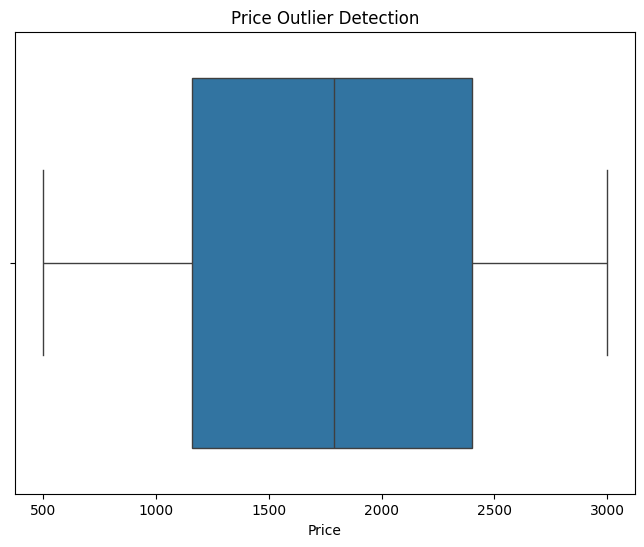

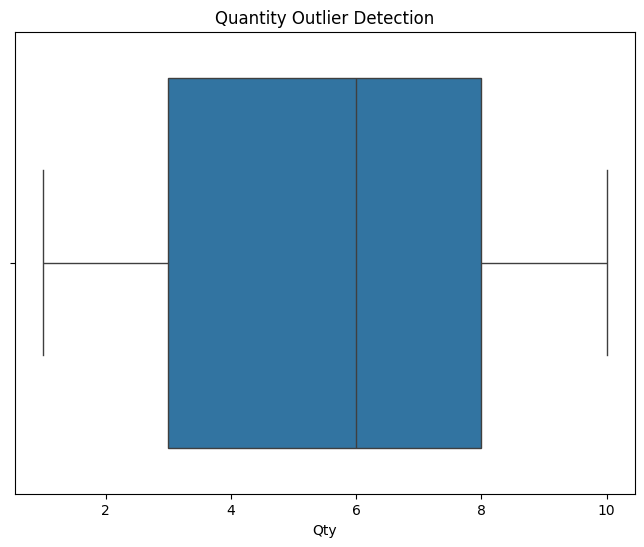

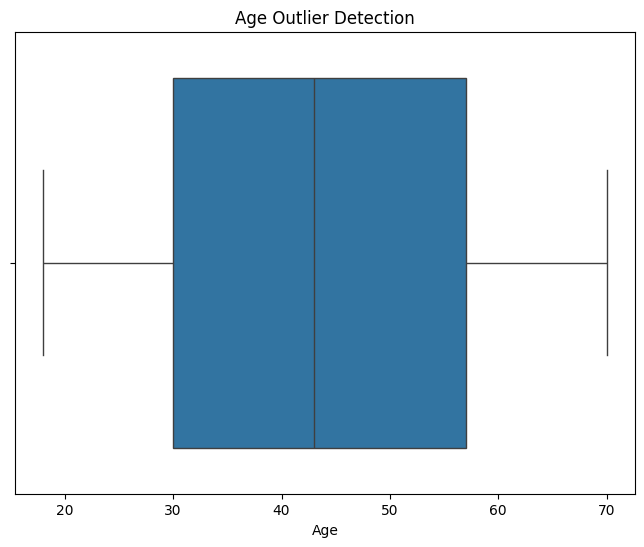

In [31]:
#===================================================================
#Outlier Detection and Removal
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.title('Price Outlier Detection')
plt.show()


#===================================================================

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Qty'])
plt.title('Quantity Outlier Detection')
plt.show()

#===================================================================

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Age'])
plt.title('Age Outlier Detection')
plt.show()



In [ ]:
#Outlier Removal using IQR method for 'Price' column

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

#===================================================================


#===================================================================
#Outlier Removal using IQR method for 'Quantity' column
Q1 = df['Qty'].quantile(0.25)
Q3 = df['Qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Qty'] >= lower_bound) & (df['Qty'] <= upper_bound)]
#===================================================================

#Outlier Removal using IQR method for 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
#===================================================================

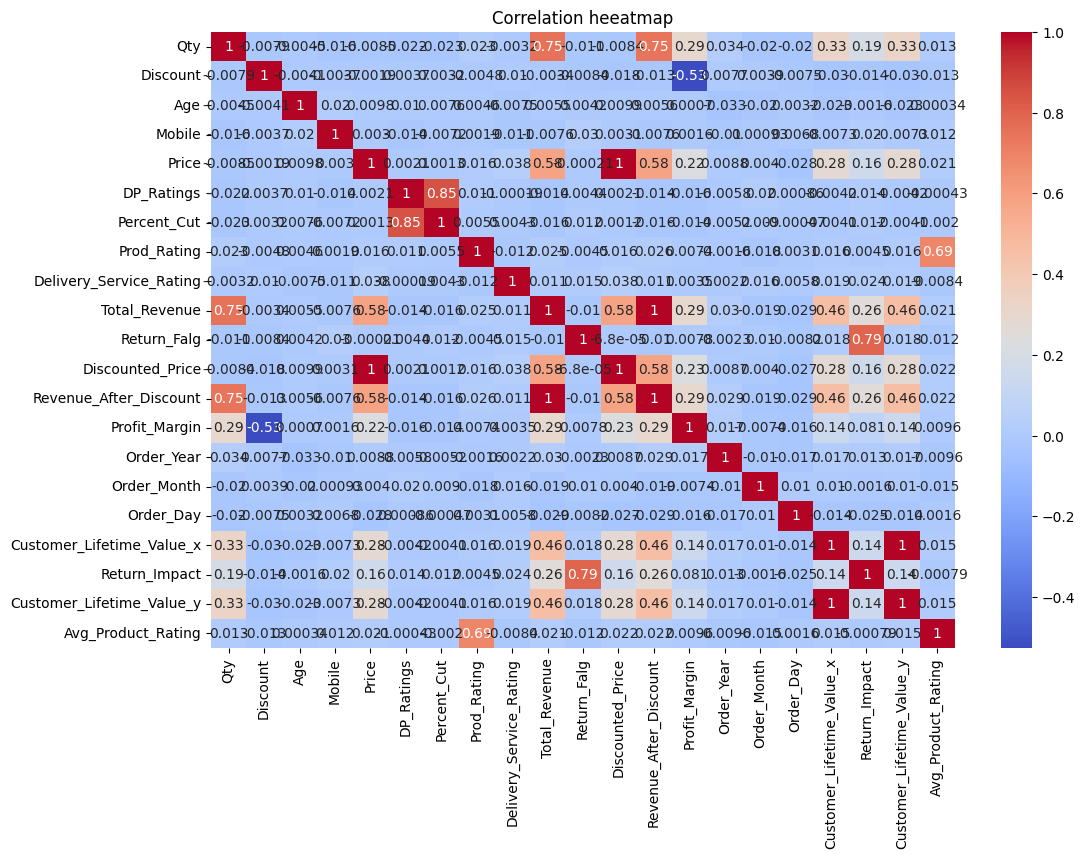

In [ ]:
#Correlation Matrix (Why?)
#===================================================================
#identify relationships between numerical variables
corr_matrix = df.corr(numeric_only=True)
#===================================================================
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()
#===================================================================

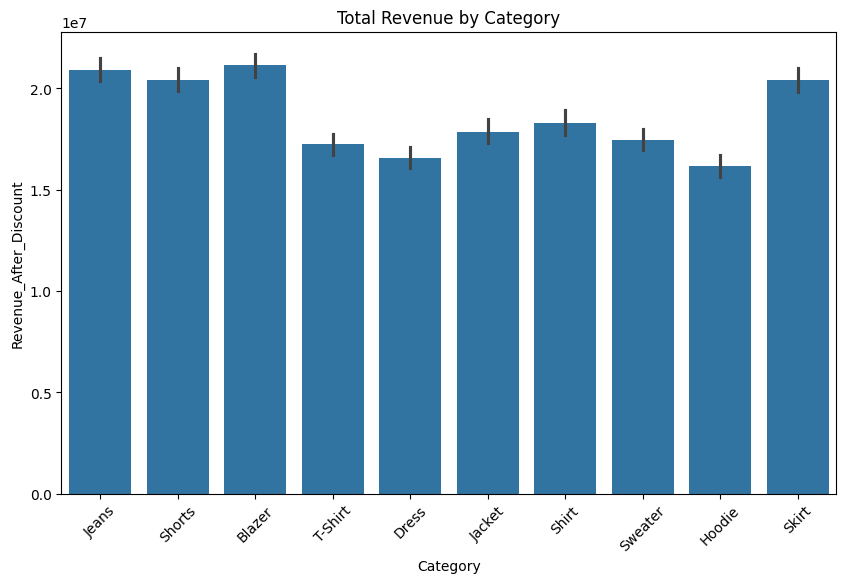

In [34]:
#Visualizations
#===================================================================   

#Revenue by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Revenue_After_Discount', data=df, estimator=sum)
plt.title('Total Revenue by Category')
plt.xticks(rotation=45)
plt.show()



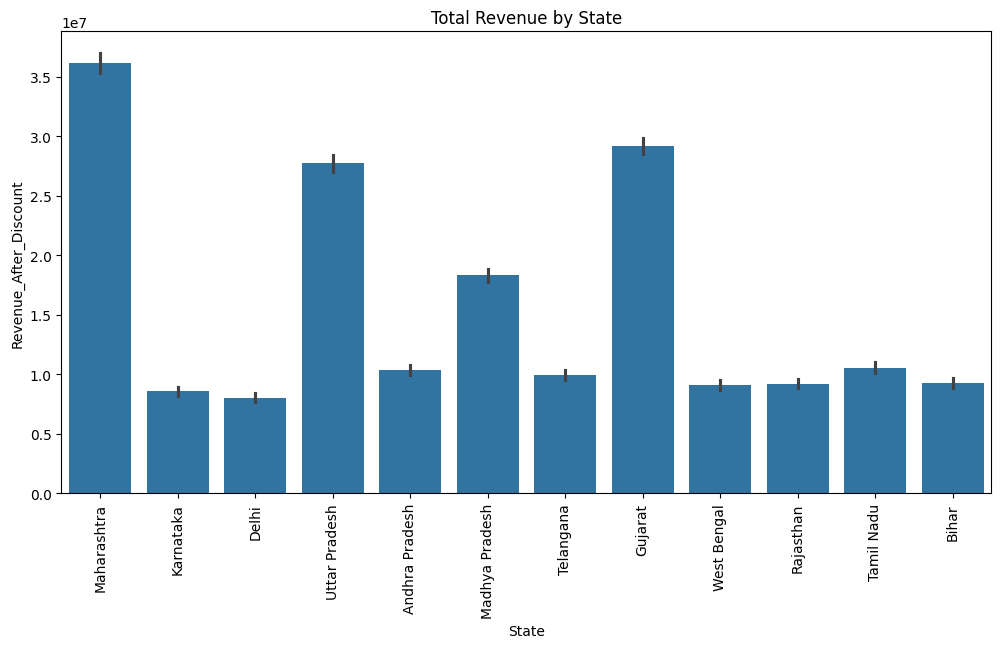

In [35]:
# Revenue by state
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Revenue_After_Discount', data=df, estimator=sum)
plt.title('Total Revenue by State')
plt.xticks(rotation=90)
plt.show()


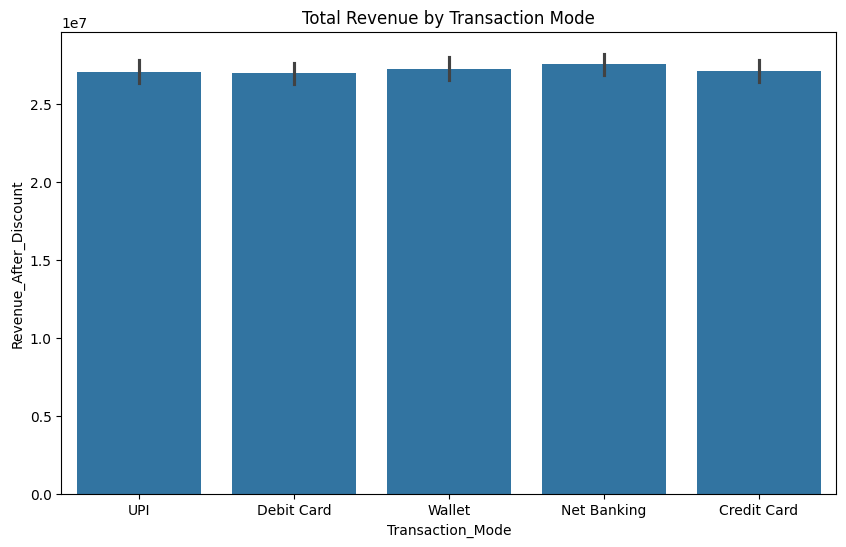

In [36]:
# Revenue by Transaction mode
plt.figure(figsize=(10,6))
sns.barplot(x='Transaction_Mode', y='Revenue_After_Discount', data=df, estimator=sum)
plt.title('Total Revenue by Transaction Mode')
plt.show()

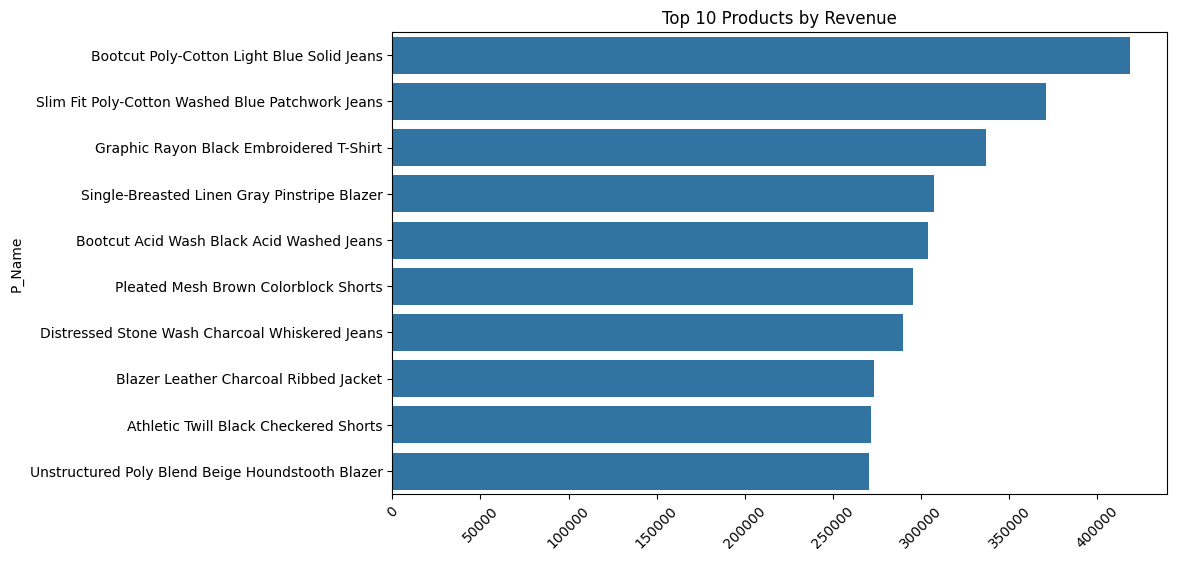

In [37]:
#Top Products by Revenue
top_products = df.groupby('P_Name')['Revenue_After_Discount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45)
plt.show()

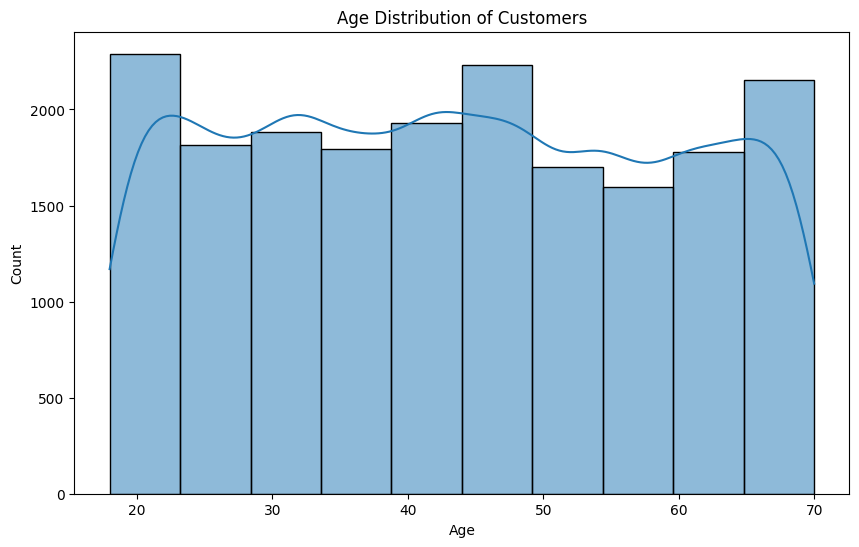

In [56]:
#Age Distribution of Customers

plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=10, kde=True )
plt.title('Age Distribution of Customers')
plt.show()

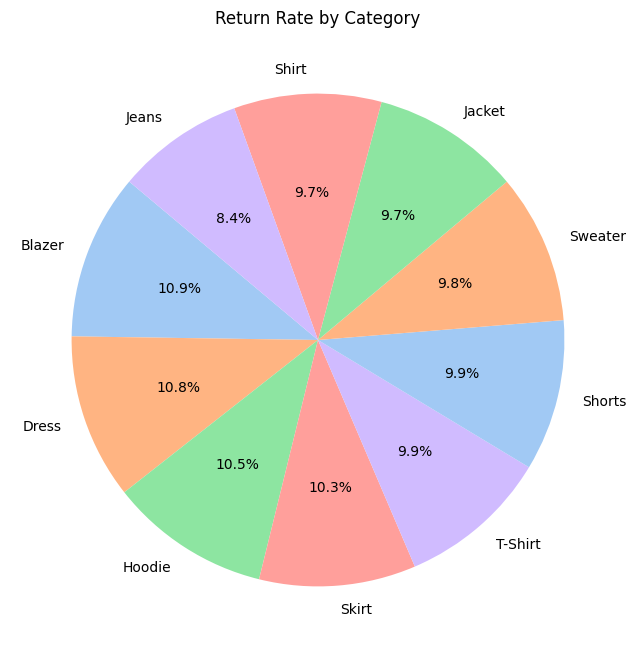

In [39]:
#Return Rate by Category
colors = sns.color_palette('pastel')[0:5]
return_rate = df.groupby('Category')['Return_Falg'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(return_rate, labels=return_rate.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Return Rate by Category')
plt.show()

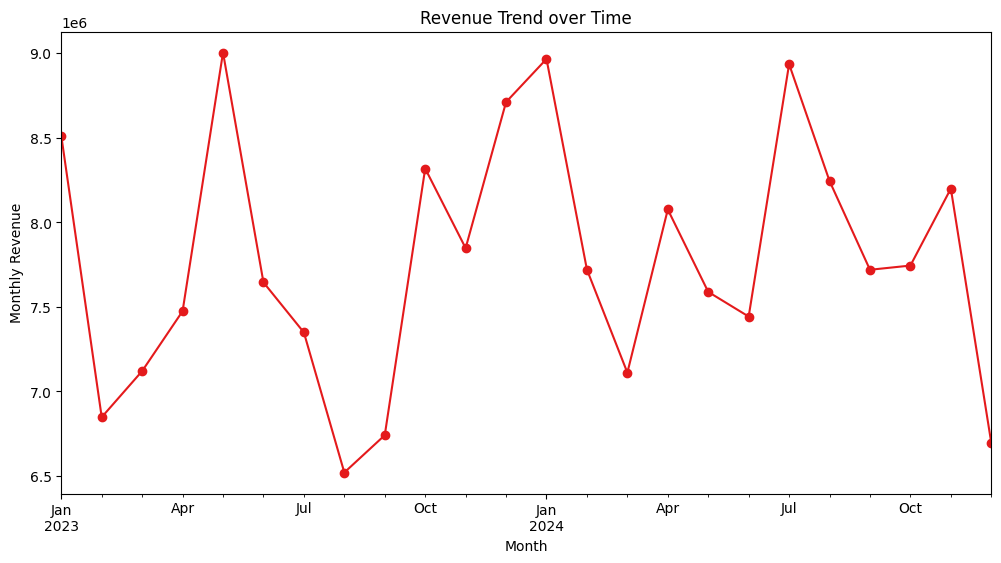

In [50]:
#Revenue Trend over Time
colors= sns.color_palette('Set1')[0:5]
df['Month'] = df['Order_Date'].dt.to_period('M')
revenue_trend = df.groupby('Month')['Revenue_After_Discount'].sum()
plt.figure(figsize=(12,6))
revenue_trend.plot(kind = 'line',marker='o', color=colors[0])
plt.title('Revenue Trend over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.show()

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_13760\2777789121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit_Margin', data=df , palette=colors)


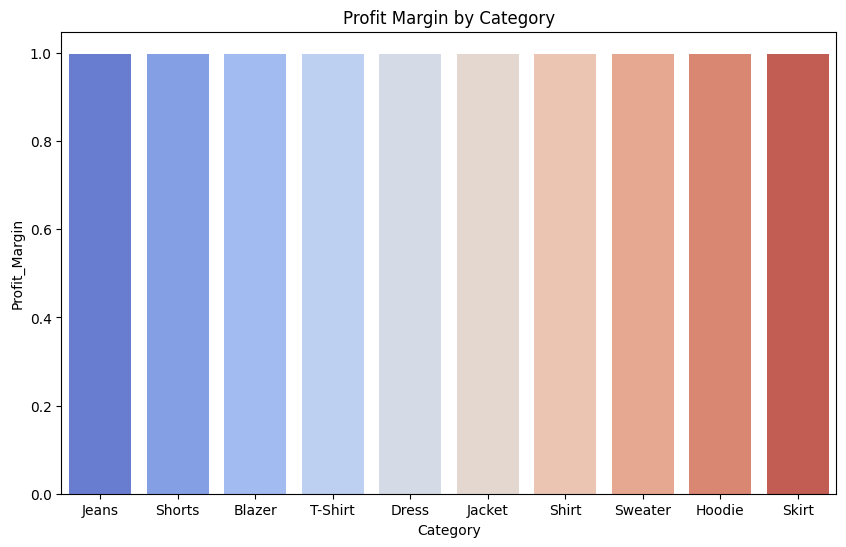

In [48]:
#Profit Margin by Category
colors = sns.color_palette("coolwarm" ,len(df['Category'].unique()))
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit_Margin', data=df , palette=colors)
plt.title('Profit Margin by Category')
plt.show()

In [46]:
#===================================================================

# Insights Summary

print("\nTop Insights:")
print(f"Highest Revenue Category: {df.groupby('Category')['Revenue_After_Discount'].sum().idxmax()}")

print(f"State with Highest Revenue: {df.groupby('State')['Revenue_After_Discount'].sum().idxmax()}")

print(f"Transaction Mode with Highest Revenue: {df.groupby('Transaction_Mode')['Revenue_After_Discount'].sum().idxmax()}")

print(f"Most Popular Product: {df.groupby('P_Name')['Revenue_After_Discount'].sum().idxmax()}")




Top Insights:
Highest Revenue Category: Blazer
State with Highest Revenue: Maharashtra
Transaction Mode with Highest Revenue: Net Banking
Most Popular Product: Bootcut Poly-Cotton Light Blue Solid Jeans
